In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import random

In [39]:
class Polynomial:
    def __init__(self, degree=0):
        self.degree = random.randint(2,8) if degree == 0 else degree
        self.coeffs = torch.rand(self.degree + 1).tolist()

    def __str__(self):
        return f"[A polynomial of Degree : {self.degree}  with coeeficents {self.coeffs} ]"

    def compute(self, x):
        res = torch.zeros_like(x)
        res += self.coeffs[0]
        for p in range(1, self.degree+1):
            res = res + self.coeffs[p]*torch.pow(x, p)
        return res



In [42]:
p = Polynomial()
print(p)
def plot(poly, left, right):
    pts = torch.linspace(left, right, 1000 )
    y = poly.compute(pts)
    plt.plot(pts.numpy(), y.numpy())
    plt.grid()

[A polynomial of Degree : 4  with coeeficents [0.1560521125793457, 0.6637549996376038, 0.6716327667236328, 0.5526899695396423, 0.15245366096496582] ]


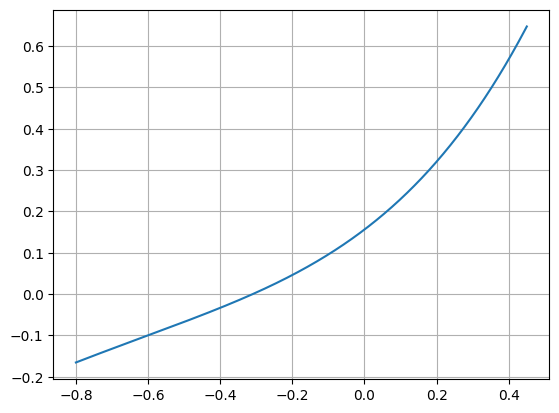

In [44]:

plot(p, -0.8, 0.45)

In [47]:
a = torch.tensor([0.21], requires_grad=True)
optimizer = torch.optim.SGD([a], lr=0.1)
for _ in range(1000):
    err = torch.pow(p.compute(a), 2)
    err.backward()
    optimizer.step()
    optimizer.zero_grad()

print(a, p.compute(a))


tensor([-0.3094], requires_grad=True) tensor([1.8789e-07], grad_fn=<AddBackward0>)
